In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu_cutdecay = [
    
    "4Mu_500GeV_0p25GeV_0p004mm",   
    "4Mu_500GeV_1p2GeV_0p019mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
]

In [3]:
fileset_cutdecay_false = utilities.make_fileset(samples_4mu_cutdecay, "cutdecay_false", location_cfg="signal_v10.yaml")
fileset_cutdecay_true = utilities.make_fileset(samples_4mu_cutdecay, "cutdecay_true", location_cfg="signal_v10.yaml")
fileset_cutdecay_false_dll0 = utilities.make_fileset(samples_4mu_cutdecay, "cutdecay_false_dll0", location_cfg="signal_v10.yaml")
fileset_cutdecay_true_dll0 = utilities.make_fileset(samples_4mu_cutdecay, "cutdecay_true_dll0", location_cfg="signal_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=5,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["genA_base"],
)

output_cutdecay_false = runner.run(fileset_cutdecay_false, treename="Events", processor_instance=p)
out_cutdecay_false = output_cutdecay_false["out"]

output_cutdecay_true = runner.run(fileset_cutdecay_true, treename="Events", processor_instance=p)
out_cutdecay_true = output_cutdecay_true["out"]

output_cutdecay_false_dll0 = runner.run(fileset_cutdecay_false_dll0, treename="Events", processor_instance=p)
out_cutdecay_false_dll0 = output_cutdecay_false_dll0["out"]

output_cutdecay_true_dll0 = runner.run(fileset_cutdecay_true_dll0, treename="Events", processor_instance=p)
out_cutdecay_true_dll0 = output_cutdecay_true_dll0["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Output()

Output()

Output()

Output()

Output()

Output()

In [4]:
samples_4mu_cutdecay_false = [
    
    "4Mu_500GeV_0p25GeV_0p004mm_Cutdecay_False",   
    "4Mu_500GeV_1p2GeV_0p019mm_Cutdecay_False",
    "4Mu_500GeV_5p0GeV_0p08mm_Cutdecay_False",
]

samples_4mu_cutdecay_true = [
    
    "4Mu_500GeV_0p25GeV_0p004mm_Cutdecay_True",   
    "4Mu_500GeV_1p2GeV_0p019mm_Cutdecay_True",
    "4Mu_500GeV_5p0GeV_0p08mm_Cutdecay_True",
]

samples_4mu_cutdecay_false_dll0 = [
    
    "4Mu_500GeV_0p25GeV_0p004mm_Cutdecay_False_dll0",   
    "4Mu_500GeV_1p2GeV_0p019mm_Cutdecay_False_dll0",
    "4Mu_500GeV_5p0GeV_0p08mm_Cutdecay_False_dll0",
]

samples_4mu_cutdecay_true_dll0 = [
    
    "4Mu_500GeV_0p25GeV_0p004mm_Cutdecay_True_dll0",   
    "4Mu_500GeV_1p2GeV_0p019mm_Cutdecay_True_dll0",
    "4Mu_500GeV_5p0GeV_0p08mm_Cutdecay_True_dll0",
]

# Cutdecay False

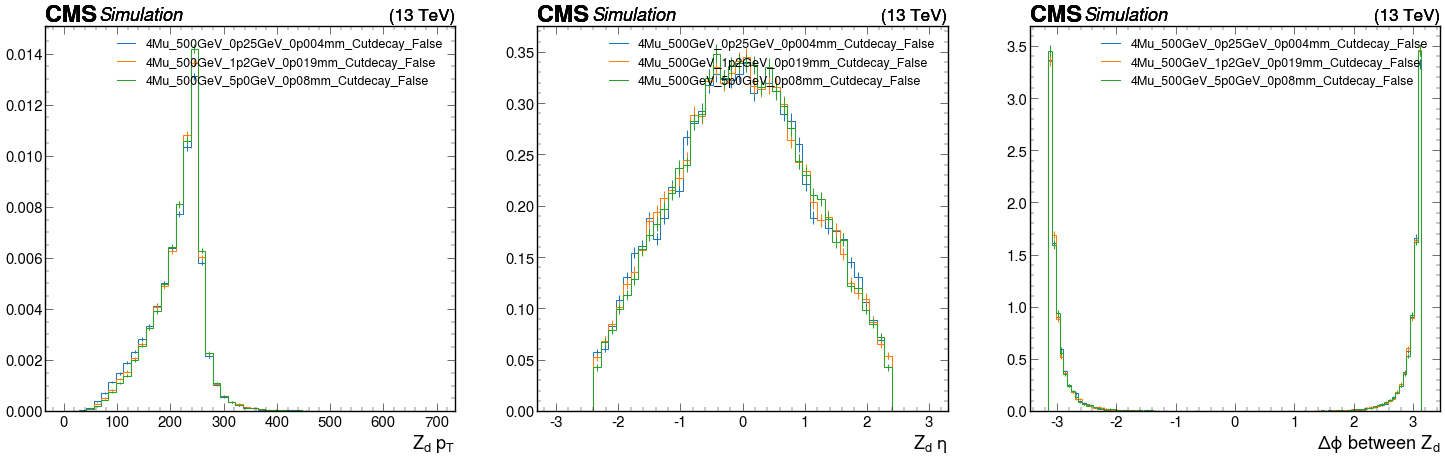

In [9]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_false[sample]["hists"]["genAs_pt_highRange"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_false, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_false[sample]["hists"]["genAs_eta"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_false, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_false[sample]["hists"]["genAs_genAs_dphi"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_false, loc=1, prop={'size': 18})

# Cutdecay True

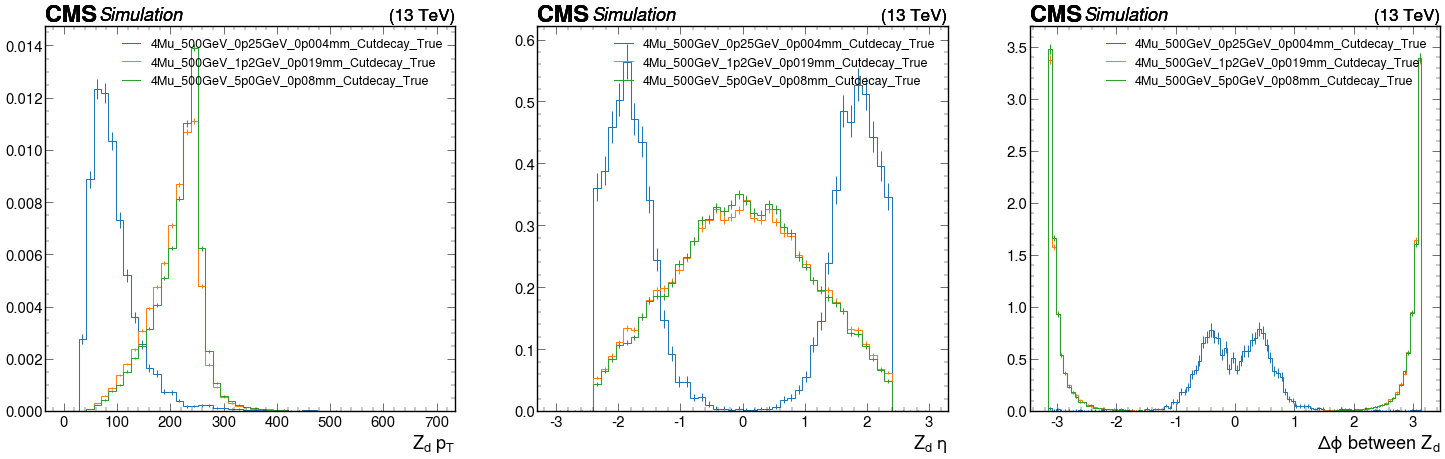

In [10]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_true[sample]["hists"]["genAs_pt_highRange"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_true, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_true[sample]["hists"]["genAs_eta"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_true, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_true[sample]["hists"]["genAs_genAs_dphi"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_true, loc=1, prop={'size': 18})

# Cutdecay False dll0

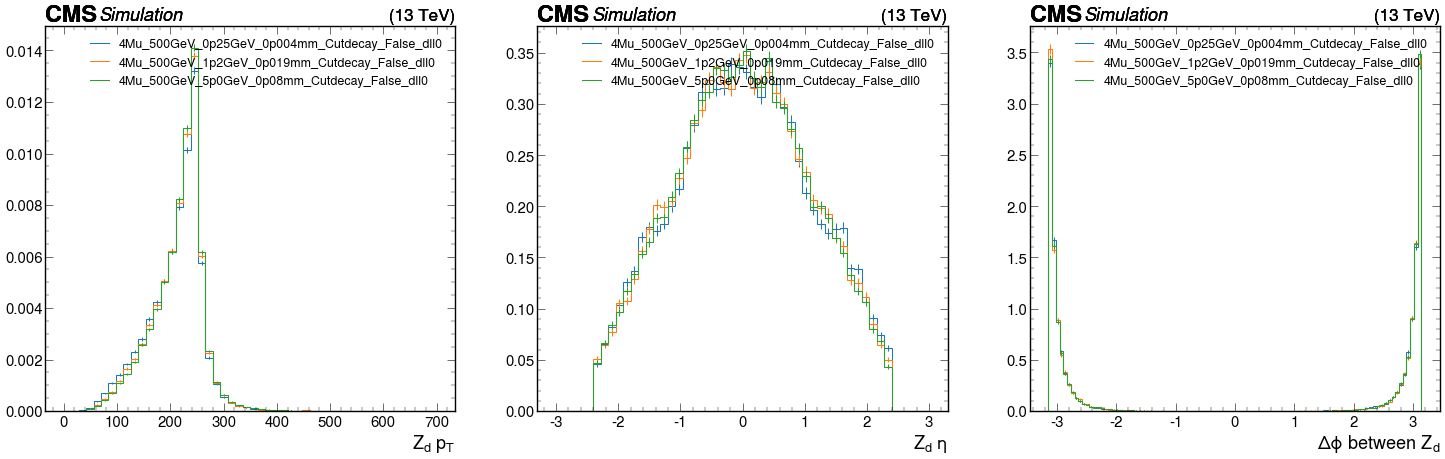

In [11]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_false_dll0[sample]["hists"]["genAs_pt_highRange"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_false_dll0, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_false_dll0[sample]["hists"]["genAs_eta"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_false_dll0, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_false_dll0[sample]["hists"]["genAs_genAs_dphi"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_false_dll0, loc=1, prop={'size': 18})

# Cutdecay True dll0

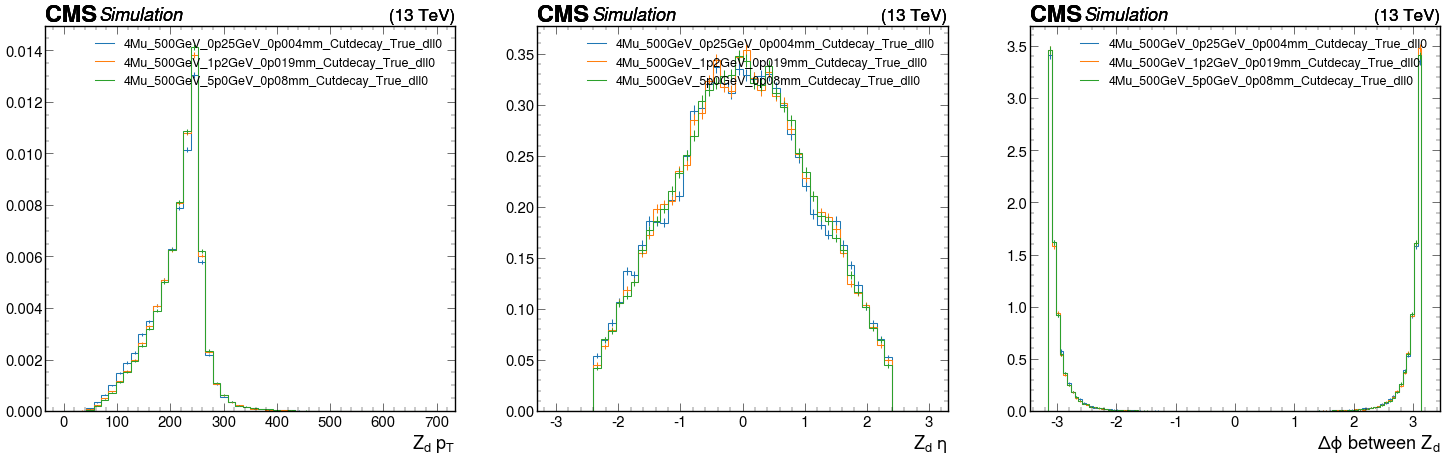

In [12]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_true_dll0[sample]["hists"]["genAs_pt_highRange"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_true_dll0, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_true_dll0[sample]["hists"]["genAs_eta"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_true_dll0, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_4mu_cutdecay:
    utilities.plot(out_cutdecay_true_dll0[sample]["hists"]["genAs_genAs_dphi"][channels[0], :], density=True)
plt.legend(samples_4mu_cutdecay_true_dll0, loc=1, prop={'size': 18})

In [17]:
for sample in samples_4mu_cutdecay:
    print(sample, "Total LJs", out_cutdecay_false[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_cutdecay_false[sample]["counters"]["0.4"]['base']['Mu-LJs'])
    print(sample, "Total EGM-LJs", out_cutdecay_false[sample]["counters"]["0.4"]['base']['EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_cutdecay_false[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_cutdecay_false[sample]["counters"]["0.4"]['base']['Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_cutdecay_false[sample]["counters"]["0.4"]['base']['Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_cutdecay_false[sample]["counters"]["0.4"]['base']['EGM-Matched-Jets'])
    print("##############################")
    print("")

4Mu_500GeV_0p25GeV_0p004mm Total LJs 44233
4Mu_500GeV_0p25GeV_0p004mm Total Mu-LJs 44080
4Mu_500GeV_0p25GeV_0p004mm Total EGM-LJs 153

4Mu_500GeV_0p25GeV_0p004mm Total Matched-Jets 44108
4Mu_500GeV_0p25GeV_0p004mm Total Leading-Mu-Matched-Jets 22055
4Mu_500GeV_0p25GeV_0p004mm Total Subleading-Mu-Matched-Jets 22023
4Mu_500GeV_0p25GeV_0p004mm Total EGM-Matched-Jets 152
##############################

4Mu_500GeV_1p2GeV_0p019mm Total LJs 38567
4Mu_500GeV_1p2GeV_0p019mm Total Mu-LJs 38431
4Mu_500GeV_1p2GeV_0p019mm Total EGM-LJs 136

4Mu_500GeV_1p2GeV_0p019mm Total Matched-Jets 38459
4Mu_500GeV_1p2GeV_0p019mm Total Leading-Mu-Matched-Jets 19229
4Mu_500GeV_1p2GeV_0p019mm Total Subleading-Mu-Matched-Jets 19203
4Mu_500GeV_1p2GeV_0p019mm Total EGM-Matched-Jets 136
##############################

4Mu_500GeV_5p0GeV_0p08mm Total LJs 37938
4Mu_500GeV_5p0GeV_0p08mm Total Mu-LJs 37839
4Mu_500GeV_5p0GeV_0p08mm Total EGM-LJs 99

4Mu_500GeV_5p0GeV_0p08mm Total Matched-Jets 37853
4Mu_500GeV_5p0GeV_0p08mm 

In [18]:
for sample in samples_4mu_cutdecay:
    print(sample, "Total LJs", out_cutdecay_true[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_cutdecay_true[sample]["counters"]["0.4"]['base']['Mu-LJs'])
    print(sample, "Total EGM-LJs", out_cutdecay_true[sample]["counters"]["0.4"]['base']['EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_cutdecay_true[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_cutdecay_true[sample]["counters"]["0.4"]['base']['Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_cutdecay_true[sample]["counters"]["0.4"]['base']['Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_cutdecay_true[sample]["counters"]["0.4"]['base']['EGM-Matched-Jets'])
    print("##############################")
    print("")

4Mu_500GeV_0p25GeV_0p004mm Total LJs 6379
4Mu_500GeV_0p25GeV_0p004mm Total Mu-LJs 6324
4Mu_500GeV_0p25GeV_0p004mm Total EGM-LJs 55

4Mu_500GeV_0p25GeV_0p004mm Total Matched-Jets 6327
4Mu_500GeV_0p25GeV_0p004mm Total Leading-Mu-Matched-Jets 3163
4Mu_500GeV_0p25GeV_0p004mm Total Subleading-Mu-Matched-Jets 3158
4Mu_500GeV_0p25GeV_0p004mm Total EGM-Matched-Jets 55
##############################

4Mu_500GeV_1p2GeV_0p019mm Total LJs 60925
4Mu_500GeV_1p2GeV_0p019mm Total Mu-LJs 60741
4Mu_500GeV_1p2GeV_0p019mm Total EGM-LJs 184

4Mu_500GeV_1p2GeV_0p019mm Total Matched-Jets 60770
4Mu_500GeV_1p2GeV_0p019mm Total Leading-Mu-Matched-Jets 30385
4Mu_500GeV_1p2GeV_0p019mm Total Subleading-Mu-Matched-Jets 30355
4Mu_500GeV_1p2GeV_0p019mm Total EGM-Matched-Jets 183
##############################

4Mu_500GeV_5p0GeV_0p08mm Total LJs 55279
4Mu_500GeV_5p0GeV_0p08mm Total Mu-LJs 55122
4Mu_500GeV_5p0GeV_0p08mm Total EGM-LJs 157

4Mu_500GeV_5p0GeV_0p08mm Total Matched-Jets 55143
4Mu_500GeV_5p0GeV_0p08mm Total 